# Ini

In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import re

In [399]:
df = pd.read_excel('../ini_data/datamon.xlsx')

# Delivery Dates

In [400]:
def date_parse(s):
    if isinstance(s, datetime):
        return s
    elif isinstance(s, str):
        return datetime.strptime(s, '%d.%m.%Y')
    return None

df['Дата поставки'] = df['Дата поставки'].apply(date_parse)

In [408]:
df.sample(5)

,Наименование,Дата поставки,Дата заказа,Срок поставки,Плановый срок поставки,Регион,Объем заказа,"Цена, руб",Условия платежа,НРП - нерегламентная потребность (внеплановая закупка),Поставщик
321,ПОЛУХОМУТ С БОЛТОМ Г34-53 190Х50,2016-09-15,2016-06-21,86.0,200.0,Мурманская область,12,11732.484076,NaN,NaN,3705
945,Сателлит 3536.11.01.004,2018-04-26,2018-02-06,79.0,200.0,Мурманская область,6,19426.751592,NaN,NaN,4012
1166,Ось 3537.12.00.005,2019-08-08,2018-04-28,467.0,470.0,Республика Карелия,2,34494.267516,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с да...,NaN,4011
2709,Вал 3519.05.02.083,2020-01-16,NaT,NaN,330.0,Республика Карелия,2,264331.210191,NaN,NaN,4014
2496,Колесо 3544.15.00.005,2019-01-21,NaT,NaN,100.0,Республика Карелия,2,276560.509554,NaN,NaN,4011


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015 entries, 0 to 4014
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Наименование                                            4015 non-null   object        
 1   Дата поставки                                           4005 non-null   object        
 2   Дата заказа                                             2939 non-null   datetime64[ns]
 3   Срок поставки                                           2939 non-null   float64       
 4   Плановый срок поставки                                  3994 non-null   float64       
 5   Регион                                                  4015 non-null   object        
 6   Объем заказа                                            4015 non-null   int64         
 7   Цена, руб                                               4015

In [7]:
df.describe()

,Срок поставки,Плановый срок поставки,Объем заказа,"Цена, руб",НРП - нерегламентная потребность (внеплановая закупка),Поставщик
count,2939.00000,3994.000000,4015.000000,4.015000e+03,303.0,4015.00000
mean,127.45900,170.007762,7.817186,7.182498e+05,1.0,3900.50411
std,123.42362,88.446546,51.075264,4.395519e+06,0.0,318.22084
min,0.00000,15.000000,1.000000,2.229299e+01,1.0,259.00000
25%,49.00000,90.000000,1.000000,2.101911e+04,1.0,3987.00000
50%,95.00000,180.000000,2.000000,1.121019e+05,1.0,4011.00000
75%,172.00000,220.000000,4.000000,3.589599e+05,1.0,4012.00000
max,807.00000,470.000000,1500.000000,1.649682e+08,1.0,4014.00000


# Names

In [8]:
df.Наименование.nunique()

1008

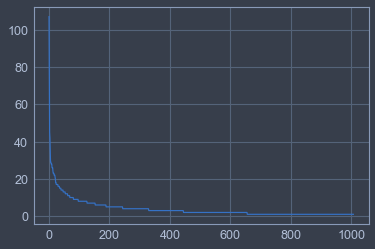

In [14]:
plt.plot(sorted(df.Наименование.value_counts(), reverse=True));

In [34]:
df['Наименование2'] = df.Наименование.apply(lambda s: s.lower().strip().replace("  ", "").replace('.', '-'))

In [35]:
df.head()

,Наименование,Дата поставки,Дата заказа,Срок поставки,Плановый срок поставки,Регион,Объем заказа,"Цена, руб",Условия платежа,НРП - нерегламентная потребность (внеплановая закупка),Поставщик,Наименование2
0,ШКИВ К МПЭ-350-900 3536.19.00.200,2017-04-10 00:00:00,2015-06-09,671.0,210.0,Республика Карелия,1,3.839490e+04,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с да...,NaN,4011,шкив к мпэ-350-900 3536-19-00-200
1,СТРЕЛА 1085.05.00СБ,2015-11-10 00:00:00,2015-08-03,99.0,180.0,Вологодская область,1,2.050955e+06,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с да...,NaN,3699,стрела 1085-05-00сб
2,УСТРОЙСТВО КУЭ-3 04УХЛ2,2015-10-27 00:00:00,2015-08-03,85.0,150.0,Вологодская область,1,1.337580e+06,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с да...,NaN,3699,устройство куэ-3 04ухл2
3,ВТУЛКА 1080.33.70,2015-08-31 00:00:00,2015-08-03,28.0,30.0,Вологодская область,6,3.439490e+03,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с да...,NaN,3699,втулка 1080-33-70
4,ЗУБ КОВША 1085.52.05-1СБ НАПЛАВКА,2015-08-31 00:00:00,2015-08-03,28.0,75.0,Вологодская область,30,6.496815e+03,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с да...,NaN,3699,зуб ковша 1085-52-05-1сб наплавка


In [36]:
df.Наименование2.nunique()

956

In [ ]:
# clean names
sub_dict = {
    r"(зуб)\s(.*)\s*(ковша)\s*(.+)": r"\1 \3 \2 \4",
    ",* *с наплавкой": " наплавка",
    "венец зубчатый": "венец зубч",
    r"блоки голов-": "блоки голов",
    r"блоки головные": "блоки голов",
    r"блоки отклон-": "блоки отклон",
    r"блок-шестерня(\d)": r"блок-шестерня \1",
    r"блок(\d)": "блок \\1",    # TODO: "блок3"
    r"блок3": "блок 3",
    "блок управления": "блок упр",
    r"блок,": "блок",
    "блоки ": "блок ",
    "блок головной": "блок голов",
    "венец3": "венец 3",
    r"венец(\d)": "венец \\1",
    r"втулка(\d)": "втулка \\1",
    # TODO: "днище"
    r"засов(\d)": "засов \\1",
    r"звено(\d)": "звено \\1",
    r"зуб(\d)": "зуб \\1",
    r"ковш(\d)": "ковш \\1",
    r"колесо(\d)": "колесо \\1",
    r"^([а-яa-z]+)(\d)": "\\1 \\2",
    # TODO: колесо
    "- ": " ",
    "   ": " ",
    "  ": " ",
    " ,": ",",
    r",(\S)": r", \1", 
}

df['Наименование3'] = df.Наименование2

for k, v in sub_dict.items():
    df.Наименование3 = df.Наименование3.apply(lambda s: re.sub(k, v, s))  

# Group Items

In [315]:
group_dict = {
    "амортизатор \d": "амортизатор",
    "барабан \d": "барабан",
    "блок \d": "блок",
    "блок голов": "блок голов",
    "блок трмз": "блок трмз",
    "блок упр": "блок упр",
    "блок-шес": "блок-шестерня",
    "болт \d": "болт",
    "бронь конуса": "бронь конуса",
    "вал \d": "вал",
    "вал веду": "вал ведущий",
    "вал промеж": "вал промежуточный",
    "вал трмз": "вал трмз",
    "вал-шест": "вал-шестерня",
    "вант ": None,
    "венец зубч": "венец зубч",
    "венец \d": "венец",
    "вентилятор": None,
    "винт": None,
    "вкладыш": None,
    "водило": None,
    "втулка \d": "втулка",
    "втулка бронз": None,
    "втулка колеса": None,
    "втулка напорной оси": None,
    "втулка сзсм": None,
    "втулка трубы": None,
    "г/цил": None,
    "гайка": None,
    "джойстик": None,
    "днище": None,
    "засов": None,
    "звездочка": None,
    "звено": None,
    "зуб": None,
    "изолятор": None,
    "клин": None,
    "ковш": None,
    "колесо": None
}

df['Группа'] = None
for k, v in group_dict.items():
    df.Группа = df.apply(
        lambda r: 
        (v if v else k)
        if (
            re.search(k, r.Наименование3) 
            and re.search(k, r.Наименование3).start() == 0 
        )
        else r.Группа,
        axis=1 
    )
    
names_out = df[['Наименование', 'Наименование3', 'Группа']]
names_out.drop_duplicates(subset='Наименование3', inplace=True)
names_out = names_out.sort_values('Наименование3', ascending=True)
names_out.to_excel('tmp.xlsx', index=False)

# l = list(names_out[names_out.str.contains('блок3')].values)[0]
# l

C:\Users\kan\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# Payment terms

In [42]:
df['Условия платежа'].unique()

array(['ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с даты ППС ДЕНЬГИ 100%',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с даты ППС ДЕНЬГИ 100%',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 45 дней с даты ППС ДЕНЬГИ 100%',
       nan,
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 10 дней с даты ППС ДЕНЬГИ 100%',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100 % в течение 20 дней с даты перехода права собственности (ППС)  ДЕНЬГИ 100% ',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 10 дней с даты счета-фактуры ДЕНЬГИ 100%',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 80 дней с даты ППС ',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100 % в течение 5 дней с даты счета-фактуры  ДЕНЬГИ 100% ',
       'ПРЕДОПЛАТА 100% в течение 10 дней с даты счета на предоплату ',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 15 дней с даты ППС ДЕНЬГИ 100%',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с даты счета-фактуры ДЕНЬГИ 100%',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с даты счета-фактуры ДЕНЬГИ 100%'],
      dtype=object)

Looks fine. Not touched.

# Order date

In [ ]:
df = 

In [360]:
pd.isnull(df["Дата заказа"])

0       False
1       False
2       False
3       False
4       False
        ...  
4010    False
4011    False
4012    False
4013    False
4014    False
Name: Дата заказа, Length: 4005, dtype: bool

In [341]:
df[(df['Дата заказа'].isnull())]

,Наименование,Дата поставки,Дата заказа,Срок поставки,Плановый срок поставки,Регион,Объем заказа,"Цена, руб",Условия платежа,НРП - нерегламентная потребность (внеплановая закупка),Поставщик,Наименование2,Наименование3,Группа,Дата заказа2,Дата заказа расчетная
2384,Втулка 1080.05.312,2019-11-29 00:00:00,NaT,NaN,120.0,Вологодская область,2,5382.165605,NaN,NaN,3989,втулка 1080-05-312,втулка 1080-05-312,втулка,NaT,True
2385,Втулка 1080.05.312,15.03.2021,NaT,NaN,120.0,Вологодская область,2,5382.165605,NaN,NaN,3989,втулка 1080-05-312,втулка 1080-05-312,втулка,NaT,True
2386,Ползун 1080.05.308,20.10.2021,NaT,NaN,45.0,Вологодская область,4,3312.101911,NaN,NaN,3989,ползун 1080-05-308,ползун 1080-05-308,None,NaT,True
2387,Втулка 1080.33.41,07.10.2020,NaT,NaN,90.0,Вологодская область,2,3728.770701,NaN,NaN,3353,втулка 1080-33-41,втулка 1080-33-41,втулка,NaT,True
2388,Втулка 1080.33.81,17.09.2018,NaT,NaN,140.0,Вологодская область,4,12525.636943,NaN,NaN,3987,втулка 1080-33-81,втулка 1080-33-81,втулка,NaT,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3453,Сателлит (тройка) черт.3588.11.01.005,2019-03-01 00:00:00,NaT,NaN,NaN,Республика Карелия,6,56687.898089,NaN,NaN,4012,сателлит (тройка) черт-3588-11-01-005,сателлит (тройка) черт-3588-11-01-005,None,NaT,True
3454,Сателлит (четверка) черт.3588.11.01.031,2019-03-01 00:00:00,NaT,NaN,NaN,Республика Карелия,8,56687.898089,NaN,NaN,4012,сателлит (четверка) черт-3588-11-01-031,сателлит (четверка) черт-3588-11-01-031,None,NaT,True
3455,Шестерня центральная черт.3588.11.01.002,2019-03-01 00:00:00,NaT,NaN,NaN,Республика Карелия,2,51592.356688,NaN,NaN,4012,шестерня центральная черт-3588-11-01-002,шестерня центральная черт-3588-11-01-002,None,NaT,True
3456,Втулка (пята) черт.3537.11.01.014,2019-02-10 00:00:00,NaT,NaN,NaN,Республика Карелия,2,1672.611465,NaN,NaN,4011,втулка (пята) черт-3537-11-01-014,втулка (пята) черт-3537-11-01-014,None,NaT,True
